# Range simulation with PyBullet

Pybullet provides several tools for building complex physics simulations. It is used in many robotic research projects and it also provides a range sensor.

In this notebook, we will use the PyBullet package to build an scene and get some range sensings.

## Installation

- Create a conda environment. I have used the name *nbvr*.
- Install the PyBullet package. 
```
pip install pybullet
```

## 3D Models Installation

PyBullets uses the URFD format for representing the objects in the scene. URDF format may be difficult to understand at fist glance therefore, we will import some models from the [Converted YCB] repository.


[Converted YCB]: <https://github.com/eleramp/pybullet-object-models>

In [22]:
# Import libraries
import pybullet as pb 
import pybullet_data
import os
import numpy as np
from pybullet_object_models import ycb_objects
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Start the pybullet server
physicsClient = pb.connect(pb.GUI)
pb.resetDebugVisualizerCamera(3, 90, -30, [0.0, -0.0, -0.0])
pb.setTimeStep(1 / 240.)

In [3]:
# Insert a plane in the environment
pb.setAdditionalSearchPath(pybullet_data.getDataPath())
planeId = pb.loadURDF('plane.urdf')

In [4]:
# Insert some objects
flags = pb.URDF_USE_INERTIA_FROM_FILE

n_objects = 10
offset = 0.2
for i in range(n_objects):
    z_pos = 0 + i*offset
    obj_id = pb.loadURDF(os.path.join(ycb_objects.getDataPath(), 'YcbBanana', "model.urdf"), [0, 0.0, z_pos], flags=flags)


In [5]:
pb.setGravity(0, 0, -9.8)

In [6]:
# Start simulation
pb.setRealTimeSimulation(1)

In [7]:
# Define the camera view matrix

viewMatrix = pb.computeViewMatrix(
    cameraEyePosition=[0, 0, 2],
    cameraTargetPosition=[0, 0, 0],
    cameraUpVector=[0, 1, 0])

In [8]:
# Define projection matrix

projectionMatrix = pb.computeProjectionMatrixFOV(
    fov=45.0,
    aspect=1.0,
    nearVal=0.1,
    farVal=3.1)

In [9]:
# Get an image

width, height, rgbImg, depthImg, segImg = pb.getCameraImage(
    width=224, 
    height=224,
    viewMatrix=viewMatrix,
    projectionMatrix=projectionMatrix)

In [10]:
depthImg.shape

(224, 224)

In [11]:
(r, c) = np.shape(depthImg)
(X, Y) = np.meshgrid(range(0, c, 10), range(0, r, 10))

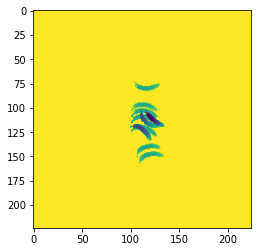

In [14]:
# Display the image
plt.imshow(depthImg)

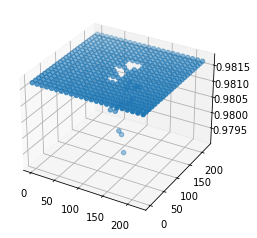

In [21]:
# Plot points from the image.
#plt.scatter3d(X, Y, depthImg[Y,X])
#plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X,Y,depthImg[Y,X])